# Desafio do Titanic
- Para começar, vamos usar o dataset do Titanic
    - [Titanic](https://www.kaggle.com/competitions/titanic/data)
- Variáveis
    - Survival:	Sobrevivência (0 = Não, 1 = Sim)
    - Pclass: Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
    - Sex: Gênero	
    - Age: Idade em anos	
    - Sibsp: Nº de irmãos/cônjuges a bordo do Titanic	
    - Parch: Nº de pais/filhos a bordo do Titanic		
    - Ticket: Número do bilhete		
    - Fare:	Tarifa do passageiro	
    - Cabin: Número da cabine	
    - Embarked:	Porto de embarcação	(C = Cherbourg, Q = Queenstown, S = Southampton)

In [76]:
#importando bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importando Bibliotecas de Machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_predict



#Algoritmos 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV




In [77]:
#Importando Dados
df_train = pd.read_csv('C:\\Users\\Thiago\\Documents\\devenvs\\ambiente_virtual3\\Projetos\\Brutos\\titanic\\train.csv')
df_test = pd.read_csv('C:\\Users\\Thiago\\Documents\\devenvs\\ambiente_virtual3\\Projetos\\Brutos\\titanic\\test.csv')

print('Tamanho dos DataFrames')
print('TRAIN:',df_train.shape)
print('TEST:',df_test.shape)

Tamanho dos DataFrames
TRAIN: (891, 12)
TEST: (418, 11)


In [78]:
#Observando as informações dos dados do Train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
#Observando as informações dos dados do Test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [80]:
#Guardando coluna PassengerId para facilitar a entrega para o Kaggle no final
passengerId = df_test['PassengerId']

In [81]:
#Juntando dados de treinamento e teste para facilitar o tratamento
df_juntos = pd.concat([df_train,df_test],axis=0,ignore_index=True)
df_juntos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [82]:
#Analisando os dados dos dois DataFrames juntos
df_juntos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [83]:
df_juntos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [84]:
#O nome não nos será ,muito util, mas cada nome tem um titulo....vou pegar somente esses titulos
separacao1 = df_juntos['Name'].apply(lambda n: n.split('.')[0])
separacao2 = separacao1.apply(lambda n: n.split(',')[1].strip())
separacao2.value_counts()

Name
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [85]:
#Como temos apenas 4 titulos(os 4 primeiros) em grande número, podemos transformar os outros em um só.
def person(t):
    if t not in ['Mr', 'Miss','Mrs','Master']:
        return 'Person'
    else:
        return t


separacao2 = separacao2.apply(lambda t: person(t))
separacao2.value_counts()

Name
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: count, dtype: int64

In [86]:
df_juntos['Title'] = separacao2
df_juntos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Person
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [87]:
def func_relatorio(data,columns,grafics = False):
    
    print(f'Valores NULOS:{data[columns].isnull().sum()}')
    print(f'Valores únicos:{data[columns].unique()}')
    print(f'Quantidade de valores unicos:{data[columns].value_counts()}')
    
    if grafics ==  False:
        sns.countplot(data=data,x=columns,hue='Survived' )
    elif grafics == True:
        sns.displot(data=data,x=columns, kde=True)

### Survived

Valores NULOS:418
Valores únicos:[ 0.  1. nan]
Quantidade de valores unicos:Survived
0.0    549
1.0    342
Name: count, dtype: int64


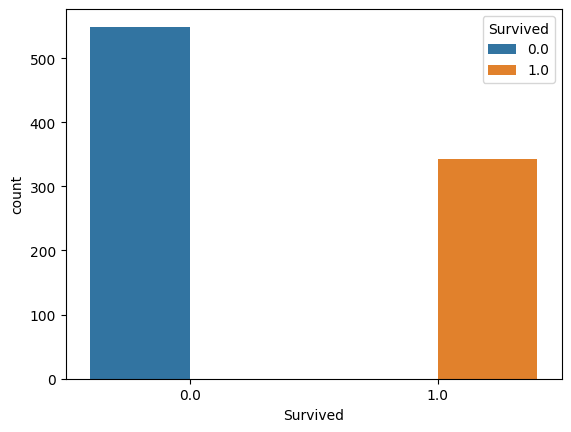

In [88]:
func_relatorio(df_juntos,'Survived')

In [89]:
#Survived está tudo certo, pode ser guardado na variável df(que representa os dados tratados)
df = pd.DataFrame()
df['Survived'] = df_juntos['Survived']

### Pclass

In [90]:
#Classe do bilhete	(1 = 1º, 2 = 2º, 3 = 3º)
func_relatorio(df_juntos,'Pclass')

Valores NULOS:0
Valores únicos:[3 1 2]
Quantidade de valores unicos:Pclass
3    709
1    323
2    277
Name: count, dtype: int64


In [91]:
df['Pclass'] = df_juntos['Pclass']

### Sex

In [92]:
#Transformando dados sex string em int, aonde 0 é male e 1 é female
df_juntos['Sex'] = df_juntos['Sex'].apply(lambda s: 0 if s == 'male' else 1)


Valores NULOS:0
Valores únicos:[0 1]
Quantidade de valores unicos:Sex
0    843
1    466
Name: count, dtype: int64


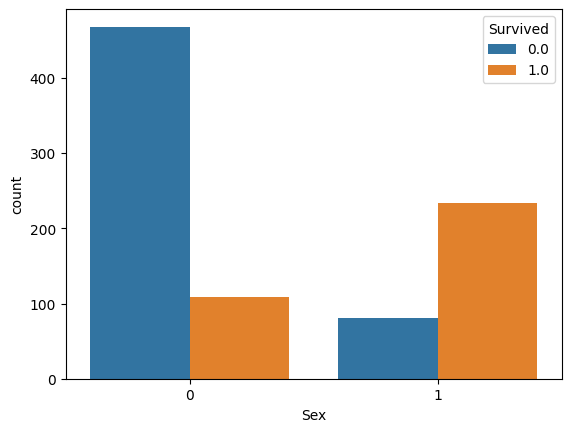

In [93]:
func_relatorio(df_juntos,'Sex')

In [94]:
df['Sex'] = df_juntos['Sex']

### Age

In [95]:
#Os valores vazios de Age
df_juntos['Age'].isnull().sum()

263

In [96]:
#Calculando media dos adultos para colocar nos dados vazios de Age
media_idade =df_juntos['Age'].groupby(df_juntos['Pclass']).mean().astype(int)
media_idade

Pclass
1    39
2    29
3    24
Name: Age, dtype: int32

In [97]:
#Calculando media das crianças para colocar nos dados vazios de Age
criança = df_juntos.loc[df_juntos['Title'] == 'Master']
media_criança = round(criança.groupby('Pclass').mean('Age')['Age'],0).astype(int)
media_criança



Pclass
1    7
2    3
3    6
Name: Age, dtype: int32

In [98]:
df_juntos[['Age','Pclass','Title']]

,Age,Pclass,Title
0,22.0,3,Mr
1,38.0,1,Mrs
2,26.0,3,Miss
3,35.0,1,Mrs
4,35.0,3,Mr
...,...,...,...
1304,NaN,3,Mr
1305,39.0,1,Person
1306,38.5,3,Mr
1307,NaN,3,Mr


In [99]:
#Preenchendo valores vazios de Age
import math

def AgeNull(age,pclass,title):

    if math.isnan(age):
        if title ==  'Master':
            return media_criança[pclass]
        else:
            return media_idade[pclass]
    else:
        return age
    

df_juntos['Age'] = df_juntos.apply(lambda a: AgeNull(a['Age'],a['Pclass'],a['Title']), axis=1).astype(int)
df_juntos['Age'].head(5)

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int32

Valores NULOS:0
Valores únicos:[22 38 26 35 24 54  2 27 14  4 58 20 39 55 29 31 34 15 28  8 19 40 66 42
 21 18  3  7 49 65  5 11 45  6 17 32 16 25  0 30 33 23 46 59 71 37 47 70
 12  9 36 51 44  1 61 56 50 62 41 52 63 43 60 10 64 13 48 53 57 80 74 67
 76]
Quantidade de valores unicos:Age
24    248
39     59
29     46
22     44
18     42
     ... 
66      1
80      1
74      1
67      1
76      1
Name: count, Length: 73, dtype: int64


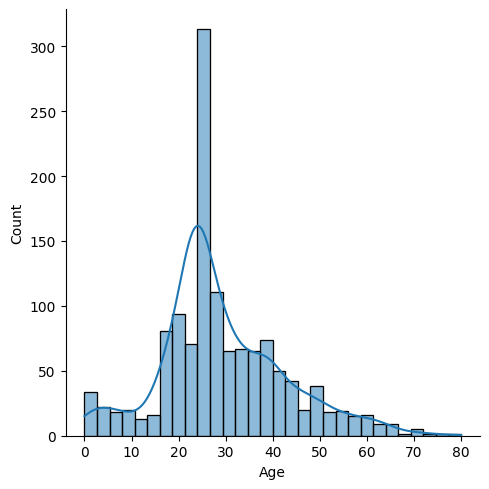

In [100]:
func_relatorio(df_juntos,'Age',True)

In [101]:
df['Age'] = df_juntos['Age']

In [102]:
df_juntos[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
1304,0,0
1305,0,0
1306,0,0
1307,0,0


### SibSp e Parch (Family)

In [103]:
#Irei juntar essas duas colunas, tendo em mente juntando a quantidade de familias total, contando com o passageiro em questão.
def sumFamily(sibSp,parch):
    return sibSp + parch + 1 #sendo esse +1, o proprio passageiro.

df_juntos['Family'] = df_juntos.apply(lambda x: sumFamily(x['SibSp'],x['Parch']),axis=1)
df_juntos['Family'].head(5)

0    2
1    2
2    1
3    2
4    1
Name: Family, dtype: int64

Valores NULOS:0
Valores únicos:[ 2  1  5  3  7  6  4  8 11]
Quantidade de valores unicos:Family
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64


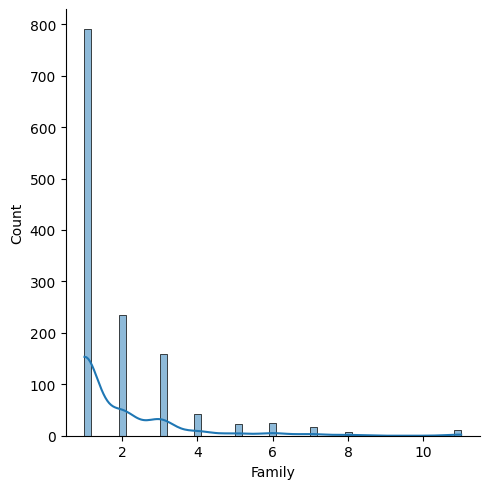

In [104]:
#Nº de irmãos/cônjuges a bordo do Titanic e Nº de pais/filhos a bordo do Titanic

func_relatorio(df_juntos,'Family',True)

In [105]:
df['Family'] = df_juntos['Family']

### Fare

In [106]:
#A única pessoa com Valor Nullo em Fare
print('Pessoas Nullas na coluna Fare:',df_juntos['Fare'].isnull().sum())
df_juntos[df_juntos['Fare'].isnull()]

Pessoas Nullas na coluna Fare: 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60,0,0,3701,NaN,NaN,S,Mr,1


In [107]:
#Procurar a media do Fare das caracteristica de Thomas, através dos dados das suas colunas
MediaThomas = df_juntos.loc[(df_juntos['Pclass'] == 3) & (df_juntos['Age'] >= 60)]['Fare'].mean()
print('Media do Passageiro 1043, Thomas:',MediaThomas)

Media do Passageiro 1043, Thomas: 7.82


In [108]:
#Trocando valores vazios em Fare(Um no caso), por mediaThomas
df_juntos['Fare'] = df_juntos['Fare'].fillna(MediaThomas)
print('Qtd de valores nullos em Fare:',df_juntos['Fare'].isnull().sum())

Qtd de valores nullos em Fare: 0


In [109]:
#Observando valores Outliers( o Max tem o valor muitissimo mais elvado que a maioria)
df_juntos['Fare'].describe()


count    1309.000000
mean       33.276017
std        51.743670
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [110]:
#Observando tipos de passageiros que pagaram valor acima de 300
df_juntos.loc[df_juntos['Fare'] >= 300]

#A questão é: Devemos tirar as pessoas que pagaram esse valor? será que seriam util para dizer a probabilidade de alguem com dinheiro sobreviver? Já que os trÊs sobreviveram
#Escolhi deixar.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
258,259,1.0,1,"Ward, Miss. Anna",1,35,0,0,PC 17755,512.3292,NaN,C,Miss,1
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",0,36,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,2
737,738,1.0,1,"Lesurer, Mr. Gustave J",0,35,0,0,PC 17755,512.3292,B101,C,Mr,1
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,58,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,2


Valores NULOS:0
Valores únicos:[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.    

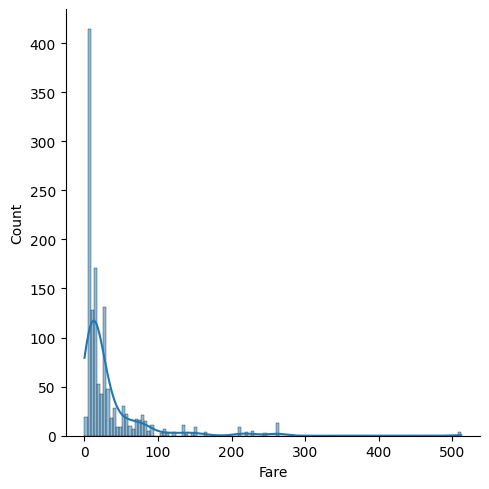

In [111]:
func_relatorio(df_juntos,'Fare',True)

In [112]:
df['Fare'] = df_juntos['Fare']

### Embarked

In [113]:
#Lidando com os valores Nullos de Embarked
df_juntos[df_juntos['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
61,62,1.0,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80.0,B28,NaN,Mrs,1


![Alt text](image-3.png)
![Alt text](image-2.png)

Fonte de pesquisa: https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html                                                                     
                
Fonte de pesquisa2: https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [114]:
#Os dois passageiros pertecem a estação de Southampton(OU ainda somente "S")
df_juntos['Embarked'].fillna('S',inplace=True)

Valores NULOS:0
Valores únicos:['S' 'C' 'Q']
Quantidade de valores unicos:Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


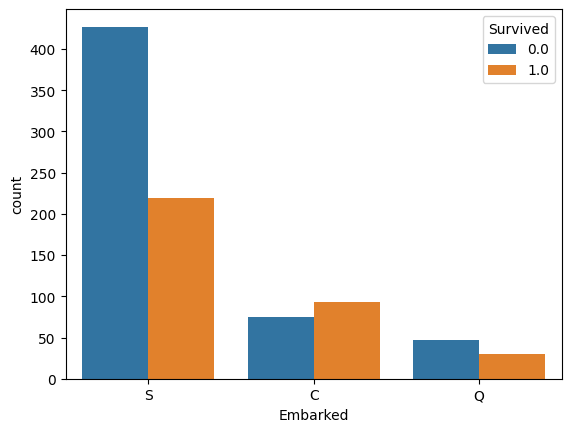

In [115]:
func_relatorio(df_juntos,'Embarked')

In [116]:
df_juntos['Embarked'].head(6)

0    S
1    C
2    S
3    S
4    S
5    Q
Name: Embarked, dtype: object

In [117]:
#Transformando letras em números, para facilitar o aprendizado de maquina.
df_juntos['Embarked'] = df_juntos['Embarked'].apply(lambda e: 0 if e == 'S' else(1 if e =='C' else 2))
df_juntos['Embarked'].head(6)

0    0
1    1
2    0
3    0
4    0
5    2
Name: Embarked, dtype: int64

In [118]:
df['Embarked'] = df_juntos['Embarked']

### Title

Valores NULOS:0
Valores únicos:['Mr' 'Mrs' 'Miss' 'Master' 'Person']
Quantidade de valores unicos:Title
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: count, dtype: int64


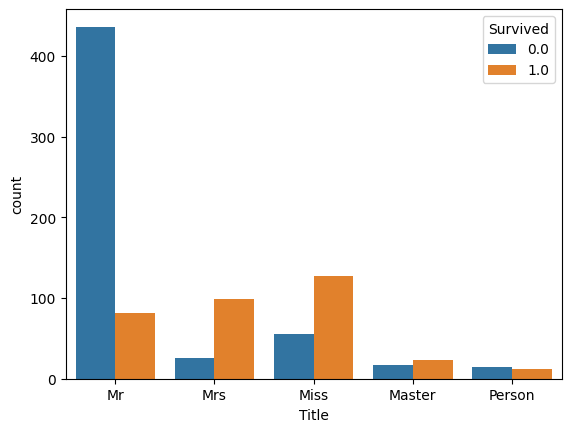

In [119]:
func_relatorio(df_juntos,'Title')

In [120]:
df_juntos['Title'].head(6)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
5      Mr
Name: Title, dtype: object

In [121]:
#Transformando texto em númerico
df_juntos['Title'] = df_juntos['Title'].apply(lambda t: 0 if t == 'Mr' else(1 if t == 'Mrs' else(2 if t == 'Miss' else(3 if t == 'Master' else 4))) )
df_juntos['Title'].head(6)

0    0
1    1
2    2
3    1
4    0
5    0
Name: Title, dtype: int64

In [122]:
df['Title'] = df_juntos['Title']

In [123]:
#Tirando a coluna Survived que os que estão com Nan são do treino, o resto está com todos os valores completos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   int32  
 4   Family    1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Title     1309 non-null   int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 76.8 KB


In [124]:
df

,Survived,Pclass,Sex,Age,Family,Fare,Embarked,Title
0,0.0,3,0,22,2,7.2500,0,0
1,1.0,1,1,38,2,71.2833,1,1
2,1.0,3,1,26,1,7.9250,0,2
3,1.0,1,1,35,2,53.1000,0,1
4,0.0,3,0,35,1,8.0500,0,0
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24,1,8.0500,0,0
1305,NaN,1,1,39,1,108.9000,1,4
1306,NaN,3,0,38,1,7.2500,0,0
1307,NaN,3,0,24,1,8.0500,0,0


In [125]:
#Aqui um espaço para fazer a coluna Cabin que eu acho que será importante para a maquina ter um desempenho melhor(mas por enquanto não vou utilizar)

------------------------------

### Machine Learning 

###Transformando Dados catogoricos em númericos, afim de facilitar o aprendizado de maquina! isto é, pego uma coluna e transformo ela em várias.


In [126]:
#Pclass de categorico em Númerico
Pclass = pd.get_dummies(df['Pclass'],'Pclass',drop_first=True,dtype=int)
Pclass
#O Drop_first serve para excluir a primeira coluna dessa separação de dados, isto afim de que a maquina gaste menos processamento, tendo no entanto esse pensamento: Se as duas coluna que sobraram são zero, logo a resposta é a coluna que eu não analisei.

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
1304,0,1
1305,0,0
1306,0,1
1307,0,1


In [127]:
##Sex de categorico em Númerico
Sex = pd.get_dummies(df['Sex'],prefix='Sex',drop_first=True,dtype=int)
Sex


,Sex_1
0,0
1,1
2,1
3,1
4,0
...,...
1304,0
1305,1
1306,0
1307,0


In [128]:
##Embarked de categorico em Númerico
Embarked = pd.get_dummies(df['Embarked'],prefix='Embarked',drop_first=True,dtype=int)
Embarked


,Embarked_1,Embarked_2
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1304,0,0
1305,1,0
1306,0,0
1307,0,0


In [129]:
#Title de categorico em Númerico

Title = pd.get_dummies(df['Title'],prefix='Title',drop_first=True,dtype=int)
Title

,Title_1,Title_2,Title_3,Title_4
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
1304,0,0,0,0
1305,0,0,0,1
1306,0,0,0,0
1307,0,0,0,0


In [130]:
df1 = pd.DataFrame()

df1 = pd.concat([df.drop(['Pclass','Sex','Embarked','Title'],axis=1),Pclass,Sex,Embarked,Title],axis=1)
df1

,Survived,Age,Family,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4
0,0.0,22,2,7.2500,0,1,0,0,0,0,0,0,0
1,1.0,38,2,71.2833,0,0,1,1,0,1,0,0,0
2,1.0,26,1,7.9250,0,1,1,0,0,0,1,0,0
3,1.0,35,2,53.1000,0,0,1,0,0,1,0,0,0
4,0.0,35,1,8.0500,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,24,1,8.0500,0,1,0,0,0,0,0,0,0
1305,NaN,39,1,108.9000,0,0,1,1,0,0,0,0,1
1306,NaN,38,1,7.2500,0,1,0,0,0,0,0,0,0
1307,NaN,24,1,8.0500,0,1,0,0,0,0,0,0,0


#### Separando entre treino e teste
###### Nas primeiras linhas estão as quantidades de treino e teste iniciais, para checar(isto porque não tirei nenhuma linha)

In [131]:
#Separando dados de treino
train = df1.loc[df1['Survived'].notnull()]
train

,Survived,Age,Family,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4
0,0.0,22,2,7.2500,0,1,0,0,0,0,0,0,0
1,1.0,38,2,71.2833,0,0,1,1,0,1,0,0,0
2,1.0,26,1,7.9250,0,1,1,0,0,0,1,0,0
3,1.0,35,2,53.1000,0,0,1,0,0,1,0,0,0
4,0.0,35,1,8.0500,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27,1,13.0000,1,0,0,0,0,0,0,0,1
887,1.0,19,1,30.0000,0,0,1,0,0,0,1,0,0
888,0.0,24,4,23.4500,0,1,1,0,0,0,1,0,0
889,1.0,26,1,30.0000,0,0,0,1,0,0,0,0,0


In [132]:
#Separando dados de teste
test =df1.loc[df1['Survived'].isnull()]
test.drop('Survived',axis=1,inplace=True)
test

C:\Users\Thiago\AppData\Local\Temp\ipykernel_20056\1236959234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Survived',axis=1,inplace=True)


,Age,Family,Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4
891,34,1,7.8292,0,1,0,0,1,0,0,0,0
892,47,2,7.0000,0,1,1,0,0,1,0,0,0
893,62,1,9.6875,1,0,0,0,1,0,0,0,0
894,27,1,8.6625,0,1,0,0,0,0,0,0,0
895,22,3,12.2875,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,24,1,8.0500,0,1,0,0,0,0,0,0,0
1305,39,1,108.9000,0,0,1,1,0,0,0,0,1
1306,38,1,7.2500,0,1,0,0,0,0,0,0,0
1307,24,1,8.0500,0,1,0,0,0,0,0,0,0


In [133]:
#Separando dados entre traino e teste(somente com os dados de treino)
X = train.drop('Survived',axis=1)
y = train['Survived'].astype(int) #astype = Transformando os dados de y de float para int

In [134]:
#Função para facilitar o teste dos aprendizados de maquinas

def fun_machine(algoritmo,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

    clf  = algoritmo.fit(x_train,y_train)
    predict = clf.predict(x_test)
    acuracia_train = round(clf.score(x_train,y_train)* 100,2)
    acuracia_test = round(clf.score(x_test,y_test)* 100,2)

    predict_train = cross_val_predict(algoritmo,x_train,y_train,cv=10)
    acuracia_cv_train = round(metrics.accuracy_score(y_train,predict_train)* 100,2)
    predict_test = cross_val_predict(algoritmo,x_test,y_test,cv=10)
    acuracia_cv_test = round(metrics.accuracy_score(y_test,predict_test)* 100,2)

    print('Acurácia de treino:',acuracia_train,'%')
    print('Acurácia de teste:',acuracia_test,'%')
    print('-'*20)
    print('Acurácia de validação cruzada de treino:',acuracia_cv_train,'%')
    print('Acurácia de validação cruzada de teste:',acuracia_cv_test,'%')

    #print('Classification Report - Acurácia de Teste')
    #print('-'*40)
    #print(metrics.classification_report(y_test,predict))
    print('-'*40)
    print('Classification Report - Acurácia de validação Cruzada_Teste')
    print('-'*40)
    print(metrics.classification_report(y_test,predict_test))
    print('-'*40)
    print('Confusion Matrix  -Acurácia de validação Cruzada_Teste') 
    print('-'*40)
    print(metrics.confusion_matrix(y_test,predict_test))
    

    return  acuracia_cv_train, acuracia_cv_test




### Random Florest

In [135]:
acc_train_rd,acc_test_rd = fun_machine(RandomForestClassifier(random_state=42),X,y)

Acurácia de treino: 98.23 %
Acurácia de teste: 79.85 %
--------------------
Acurácia de validação cruzada de treino: 80.74 %
Acurácia de validação cruzada de teste: 80.22 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[132  25]
 [ 28  83]]


### Decision Tree Classifiers

In [136]:
acc_train_tree,acc_test_tree = fun_machine(DecisionTreeClassifier(random_state=42),X,y)

Acurácia de treino: 98.23 %
Acurácia de teste: 78.36 %
--------------------
Acurácia de validação cruzada de treino: 78.65 %
Acurácia de validação cruzada de teste: 76.12 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.71      0.71      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[125  32]
 [ 32  79]]


### Logistic Regression

In [137]:
acc_train_lg,acc_test_lg = fun_machine(LogisticRegression(max_iter=10000,random_state=42),X,y)


Acurácia de treino: 83.79 %
Acurácia de teste: 81.72 %
--------------------
Acurácia de validação cruzada de treino: 83.15 %
Acurácia de validação cruzada de teste: 81.72 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       157
           1       0.80      0.75      0.77       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[136  21]
 [ 28  83]]


### Support vector machine

In [138]:
acc_train_svm,acc_test_svm = fun_machine(LinearSVC(dual=False,random_state=42),X,y)

Acurácia de treino: 83.79 %
Acurácia de teste: 82.46 %
--------------------
Acurácia de validação cruzada de treino: 83.31 %
Acurácia de validação cruzada de teste: 83.58 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       157
           1       0.79      0.82      0.81       111

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[133  24]
 [ 20  91]]


### K Neighbors Classifiers

In [139]:
acc_train_kn,acc_test_kn = fun_machine(KNeighborsClassifier(),X,y)

Acurácia de treino: 79.13 %
Acurácia de teste: 70.52 %
--------------------
Acurácia de validação cruzada de treino: 71.11 %
Acurácia de validação cruzada de teste: 70.15 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       157
           1       0.63      0.66      0.65       111

    accuracy                           0.70       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.70      0.70      0.70       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[115  42]
 [ 38  73]]


### Gaussian Naive Bayes

In [140]:
acc_train_gaus,acc_test_gaus = fun_machine(GaussianNB(),X,y)

Acurácia de treino: 81.06 %
Acurácia de teste: 79.85 %
--------------------
Acurácia de validação cruzada de treino: 79.61 %
Acurácia de validação cruzada de teste: 76.49 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.72      0.71      0.71       111

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.76      0.76      0.76       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[126  31]
 [ 32  79]]


### Stochastic Gradient Descent


In [141]:
acc_train_sgd,acc_test_sgd = fun_machine(SGDClassifier(),X,y)

Acurácia de treino: 63.72 %
Acurácia de teste: 59.33 %
--------------------
Acurácia de validação cruzada de treino: 71.43 %
Acurácia de validação cruzada de teste: 73.51 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       157
           1       0.69      0.65      0.67       111

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.74      0.73       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[125  32]
 [ 39  72]]


### Gradient boost Classifier


In [142]:
acc_train_gb,acc_test_gb = fun_machine(GradientBoostingClassifier(),X,y)

Acurácia de treino: 92.13 %
Acurácia de teste: 81.34 %
--------------------
Acurácia de validação cruzada de treino: 82.66 %
Acurácia de validação cruzada de teste: 81.72 %
----------------------------------------
Classification Report - Acurácia de validação Cruzada_Teste
----------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       157
           1       0.77      0.79      0.78       111

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

----------------------------------------
Confusion Matrix  -Acurácia de validação Cruzada_Teste
----------------------------------------
[[131  26]
 [ 23  88]]


---------------------------------------

### Comparando os modelos

In [143]:
modelos = pd.DataFrame({'modelo':['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression','LinearSVC','KNeighborsClassifier','GaussianNB','SGDClassifier','GradientBoostingClassifier'],
    'Acuracia_Treino':[acc_train_rd,acc_train_tree,acc_train_lg,acc_train_svm,acc_train_kn,acc_train_gaus,acc_train_sgd,acc_train_gb],
                        'Acuracia_Teste':[acc_test_rd,acc_test_tree,acc_test_lg,acc_test_svm,acc_test_kn,acc_test_gaus,acc_test_sgd,acc_test_gb]})
modelos.sort_values(by=['Acuracia_Teste','Acuracia_Treino'],ascending=False)

,modelo,Acuracia_Treino,Acuracia_Teste
3,LinearSVC,83.31,83.58
2,LogisticRegression,83.15,81.72
7,GradientBoostingClassifier,82.66,81.72
0,RandomForestClassifier,80.74,80.22
5,GaussianNB,79.61,76.49
1,DecisionTreeClassifier,78.65,76.12
6,SGDClassifier,71.43,73.51
4,KNeighborsClassifier,71.11,70.15


### Implementando modelo em dados de test

In [144]:
#Parâmetros para o algoritmo escolhido
params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000],
    # Outros parâmetros do RandomForestRegressor
}

In [145]:
#Aplicando e treinando modelo com  parâmetros
lvc = LinearSVC()
lvs_vc = GridSearchCV(estimator=lvc, param_grid=params, cv=10)

lvs_vc.fit(X,y)

c:\Users\Thiago\Documents\devenvs\ambiente_virtual3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thiago\Documents\devenvs\ambiente_virtual3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thiago\Documents\devenvs\ambiente_virtual3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thiago\Documents\devenvs\ambiente_virtual3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Thiago\Documents\devenvs\ambiente_virtual3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Us

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']})

In [146]:
print(f'Melhor pontuação:{lvs_vc.best_score_}')
print(f'Melhores parâmetros:{lvs_vc.best_estimator_}')

Melhor pontuação:0.8305118601747814
Melhores parâmetros:LinearSVC(C=0.1)


In [147]:
#Predição dos Dados de teste
GradientBoostingClassifier_pred = lvs_vc.predict(test)
GradientBoostingClassifier_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [148]:
#Salvando arquivos para submeter ao Kaggle
kaggle =  pd.DataFrame({'PassengerId':passengerId,'Survived': GradientBoostingClassifier_pred })
kaggle.to_csv('titanic_LinearSVC_pred.csv',index=False)

In [149]:
kaggle

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
